## Chapter 3 - Image restoration, Noise, Segmentation and Contours

Apply image restoration to remove objects, logos, text, or damaged areas in pictures! Also learn how to apply noise, use segmentation to speed up processing, and find elements in images by their contours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from skimage import io

In [2]:
# Show image
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [3]:
# Plot Comparison
def plot_comparison(original, filtered, title_filtered, title_original="original"):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title(title_original)
  ax1.axis("off")

  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis("off")

In [4]:
plt.rcParams["figure.figsize"] = (12,9)

### 📒 1. Image restoration

**Image Reconstruction:**
- Fixing damaged images
- Removing texts
- Deleting logos
- Removing objects

Reconstructing lost and deteriorated parts of images is known as inpainting. The reconstructing is supposed to be performed in a fully automatic way by exploiting the information presented in the non damaged regions of the image.

<br>

A mask image is an image where some of the pixel intensity values are zero and others are non-zero.

### 📝 Let's restore a damaged image

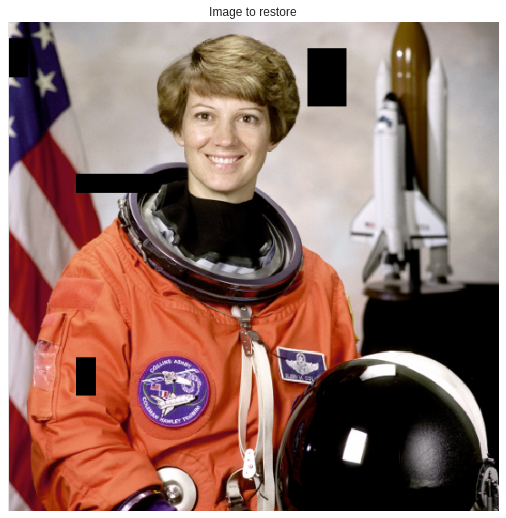

In [5]:
defect_image = io.imread("https://raw.githubusercontent.com/goodboychan/datacamp_repo/master/Image.Processing.in.Python/dataset/damaged_astronaut.png")
show_image(defect_image, "Image to restore")

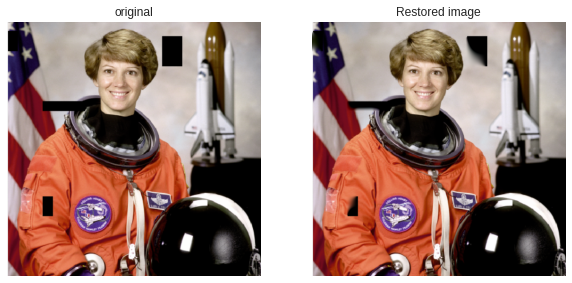

In [6]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

defect_image = plt.imread('https://raw.githubusercontent.com/goodboychan/datacamp_repo/master/Image.Processing.in.Python/dataset/damaged_astronaut.png')
defect_image = resize(defect_image, (512, 512))
defect_image = color.rgba2rgb(defect_image)

mask = pd.read_csv('https://raw.githubusercontent.com/goodboychan/datacamp_repo/master/Image.Processing.in.Python/dataset/astronaut_mask.csv').to_numpy()

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

# Show ther defective image
plot_comparison(defect_image, restored_image, 'Restored image')

### 📝 Removing logos

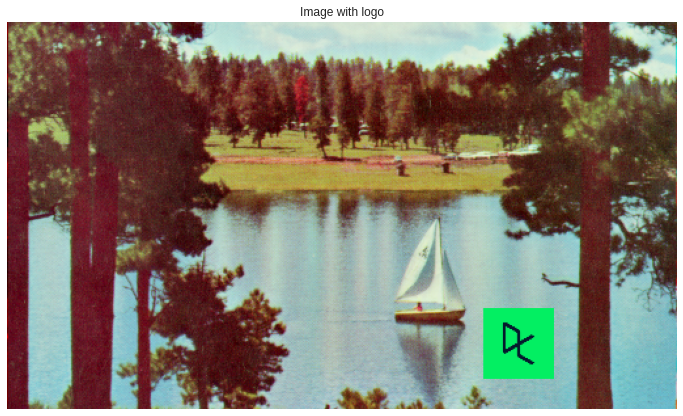

In [7]:
image_with_logo = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/c4ea35693d35f1fa5bc6371c564187a5fcf03e8f/4.2.06-with-new-logo.png")
show_image(image_with_logo, "Image with logo")

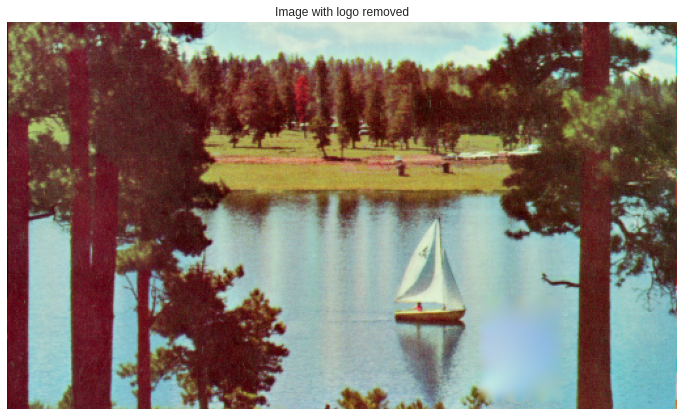

In [8]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_logo_removed, 'Image with logo removed')